In [61]:
import cv2
import os
import numpy as np
from imutils import paths
import random

In [53]:
images=sorted(list(paths.list_files('animals/')))

In [54]:
images

['animals/cats/cats_00001.jpg',
 'animals/cats/cats_00002.jpg',
 'animals/cats/cats_00003.jpg',
 'animals/cats/cats_00004.jpg',
 'animals/cats/cats_00005.jpg',
 'animals/cats/cats_00006.jpg',
 'animals/cats/cats_00007.jpg',
 'animals/cats/cats_00008.jpg',
 'animals/cats/cats_00009.jpg',
 'animals/cats/cats_00010.jpg',
 'animals/cats/cats_00011.jpg',
 'animals/cats/cats_00012.jpg',
 'animals/cats/cats_00013.jpg',
 'animals/cats/cats_00014.jpg',
 'animals/cats/cats_00015.jpg',
 'animals/cats/cats_00016.jpg',
 'animals/cats/cats_00017.jpg',
 'animals/cats/cats_00018.jpg',
 'animals/cats/cats_00019.jpg',
 'animals/cats/cats_00020.jpg',
 'animals/cats/cats_00021.jpg',
 'animals/cats/cats_00022.jpg',
 'animals/cats/cats_00023.jpg',
 'animals/cats/cats_00024.jpg',
 'animals/cats/cats_00025.jpg',
 'animals/cats/cats_00026.jpg',
 'animals/cats/cats_00027.jpg',
 'animals/cats/cats_00028.jpg',
 'animals/cats/cats_00029.jpg',
 'animals/cats/cats_00030.jpg',
 'animals/cats/cats_00031.jpg',
 'animal

In [55]:
images[1]

'animals/cats/cats_00002.jpg'

In [56]:
labels=[]
data=[]


In [57]:
test_image=cv2.imread(images[0])

In [58]:
test_image.shape

(374, 500, 3)

In [59]:
shape0=[]
shape1=[]

for image in images:
    targetimage=cv2.imread(image)
    shape0.append(targetimage.shape[0])
    shape1.append(targetimage.shape[1])

In [60]:
print(min(shape0),min(shape1))
print(max(shape0),max(shape1))

32 55
1200 1600


In [62]:
random.seed(20)
random.shuffle(images)

for image in images:
    targetimage=cv2.imread(image)
    targetimage=cv2.resize(targetimage,(32,32)).flatten()
    data.append(targetimage)
    labels.append(image.split('/')[1])
    

In [63]:
labels[2001]

'cats'

In [64]:
data=np.array(data)
labels=np.array(labels)

In [65]:
data=np.array(data,dtype='float')/255.0

In [66]:
data

array([[0.8745098 , 0.95686275, 0.96470588, ..., 0.32156863, 0.34117647,
        0.69019608],
       [0.34117647, 0.3372549 , 0.36078431, ..., 0.28235294, 0.35686275,
        0.44313725],
       [0.36470588, 0.47843137, 0.5372549 , ..., 0.23137255, 0.40784314,
        0.60784314],
       ...,
       [0.04313725, 0.04313725, 0.04313725, ..., 0.11764706, 0.13333333,
        0.1372549 ],
       [0.27058824, 0.4       , 0.38823529, ..., 0.14509804, 0.16470588,
        0.23921569],
       [0.14509804, 0.24313725, 0.16470588, ..., 0.69019608, 0.6627451 ,
        0.61568627]])

In [67]:
data[2000]

array([0.14901961, 0.22745098, 0.15686275, ..., 0.42352941, 0.58823529,
       0.6627451 ])

In [68]:
labels[2000]

'panda'

In [70]:
from sklearn.model_selection import train_test_split

In [73]:
(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.20)

In [74]:
trainX.shape

(2400, 3072)

In [75]:
testX.shape

(600, 3072)

In [76]:
print(trainY.shape,testY.shape)

(2400,) (600,)


In [77]:
from sklearn.preprocessing import LabelBinarizer


In [78]:
lb=LabelBinarizer()
trainY=lb.fit_transform(trainY)
testY=lb.fit_transform(testY)

In [79]:
trainY[0]

array([1, 0, 0])

# Steps in Preprocessing
## 1. Randomize, Read all images and append to arrays
## 2. Resized all the images based on minimum image size and flattened
## 3. Split the Labels and Images into separate arrays
## 4. Normalize each image by changing to float and dividing by 255.0 (So each pixel intensity is between 0 and 1)
## 5. Data is split into Train and Testing 
## 6. One Hot encode the targets

In [128]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD

In [92]:
model=Sequential()
model.add(Dense(1024,input_shape=(3072,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(3,activation='softmax'))

In [93]:
model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [94]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=50,batch_size=32)

Train on 2400 samples, validate on 600 samples
Epoch 1/50
2400/2400 [==============================] - 4s 2ms/step - loss: 1.0910 - accuracy: 0.3837 - val_loss: 1.0345 - val_accuracy: 0.4700
Epoch 2/50
2400/2400 [==============================] - 3s 1ms/step - loss: 1.0021 - accuracy: 0.5138 - val_loss: 0.9641 - val_accuracy: 0.5300
Epoch 3/50
2400/2400 [==============================] - 3s 1ms/step - loss: 0.9381 - accuracy: 0.5433 - val_loss: 0.9188 - val_accuracy: 0.5533
Epoch 4/50
2400/2400 [==============================] - 3s 1ms/step - loss: 0.8990 - accuracy: 0.5621 - val_loss: 0.8884 - val_accuracy: 0.5583
Epoch 5/50
2400/2400 [==============================] - 3s 1ms/step - loss: 0.8734 - accuracy: 0.5696 - val_loss: 0.8764 - val_accuracy: 0.5617
Epoch 6/50
2400/2400 [==============================] - 3s 1ms/step - loss: 0.8519 - accuracy: 0.5738 - val_loss: 0.8847 - val_accuracy: 0.5567
Epoch 7/50
2400/2400 [==============================] - 3s 1ms/step - loss: 0.8396 - accu

In [96]:
model.predict(testX)

array([[1.3752201e-01, 2.2958636e-01, 6.3289160e-01],
       [7.9528689e-01, 2.0400304e-01, 7.1007799e-04],
       [7.3056787e-01, 2.6391196e-01, 5.5202665e-03],
       ...,
       [7.0464474e-01, 2.9506940e-01, 2.8587686e-04],
       [5.4638487e-01, 4.5201313e-01, 1.6019671e-03],
       [3.5267377e-01, 6.4329541e-01, 4.0308447e-03]], dtype=float32)

In [97]:
testY

array([[0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [98]:
target_image=cv2.imread('/Users/praveenkumar/Downloads/Pembroke-Welsh-Corgi-standing-outdoors-in-the-fall.jpg')

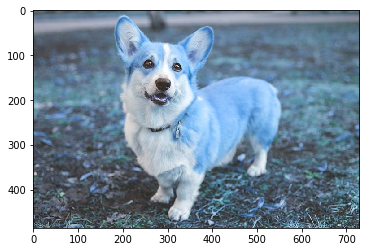

In [101]:
import matplotlib.pyplot as plt
plt.imshow(target_image)
plt.show()

In [104]:
target_image=cv2.resize(target_image,(32,32))

In [106]:
target_image.shape

(32, 32, 3)

In [107]:
target_image=target_image.flatten()

In [109]:
target_image=target_image.astype('float')/255

In [110]:
target_image

array([0.30980392, 0.36862745, 0.40392157, ..., 0.21176471, 0.27843137,
       0.28235294])

In [111]:
target_image.shape

(3072,)

In [113]:
model.predict(target_image.reshape(1,3072))

array([[3.3006245e-01, 6.6954160e-01, 3.9597263e-04]], dtype=float32)

In [114]:
model.save('dogpandaclassifier.h5')

1. Read about Pneumonia
2. Search for Pneumonia Datasets


1. Play with the Dog cat Panda classifier- Optimize it for an accuracy >90

In [124]:
from keras.preprocessing.image import ImageDataGenerator

training_generator=ImageDataGenerator(rescale=1./255,validation_split=0.25)

In [125]:
type(train_generator)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [126]:
training=training_generator.flow_from_directory('animals/',target_size=(150,150),
                                                batch_size=15,class_mode='categorical',subset='training')

Found 2250 images belonging to 3 classes.


In [127]:
validation=training_generator.flow_from_directory('animals/',target_size=(150,150),
                                                batch_size=15,class_mode='categorical',subset='validation')

Found 750 images belonging to 3 classes.


In [129]:
import tensorflow as tf


In [131]:
# First Convolution Layer
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 tf.keras.layers.Dropout(0.15),
                                  #Second Convolution Layer
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                  #Third Convolution Layer
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                  #Flattening Layer
                                  tf.keras.layers.Flatten(),
                                  # Dense 1
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  #Dense2/Output Layer
                                  tf.keras.layers.Dense(3,activation='softmax')
                                  
                                 ])

In [132]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [133]:
history=model.fit(training,validation_data=validation,epochs=20)

Train for 150 steps, validate for 50 steps
Epoch 1/20
150/150 [==============================] - 68s 456ms/step - loss: 1.0517 - acc: 0.5560 - val_loss: 0.7657 - val_acc: 0.6280
Epoch 2/20
150/150 [==============================] - 58s 387ms/step - loss: 0.7071 - acc: 0.6382 - val_loss: 0.8150 - val_acc: 0.5960
Epoch 3/20
150/150 [==============================] - 56s 373ms/step - loss: 0.6209 - acc: 0.6782 - val_loss: 0.7502 - val_acc: 0.6480
Epoch 4/20
150/150 [==============================] - 57s 377ms/step - loss: 0.5311 - acc: 0.7444 - val_loss: 0.6368 - val_acc: 0.6933
Epoch 5/20
150/150 [==============================] - 56s 373ms/step - loss: 0.4702 - acc: 0.7849 - val_loss: 0.7269 - val_acc: 0.6840
Epoch 6/20
150/150 [==============================] - 59s 394ms/step - loss: 0.3690 - acc: 0.8307 - val_loss: 0.8102 - val_acc: 0.6800
Epoch 7/20
150/150 [==============================] - 56s 373ms/step - loss: 0.3263 - acc: 0.8636 - val_loss: 0.8287 - val_acc: 0.6613
Epoch 8/20
1